# Investating and Improving Movie Production

Movies have been being produced for 127 years, lending itself to a massive collection of data associated with those movies. It is in the best interest of Computing Vision to follow these guidelines in order to produce movies of a higher quality that produce higher net profit.

Based on the data collected by `IMDB`, `The Numbers`, `The Movie Data Base`, and `Box Office Mojo`, we are able to determine that there are three major areas of interest that Computing Vision should focus on in order to maximize profits of their newly created content. The top three metrics are as follows:
* Release Month
* Director
* Writer

We will be diving into Release month and its impact on net profit. Before we can do that there are some standard modules that we will use to demonstrate the impact of these metrics.

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
import calendar

conn = sqlite3.connect('data/im.db')

ModuleNotFoundError: No module named 'pandas'

## Release Month
If we aggregate data from `The Numbers` database we can determine which months have the movies that average the most profit.

### Step 1 - Pull the data from the database

In [72]:
month_agg_data = pd.read_sql("""
SELECT SUBSTR(release_date, 0, 4) as month, AVG(worldwide_gross - production_budget) as mean_net_profit
FROM movie_budgets
GROUP BY month
ORDER BY mean_net_profit DESC;
""", conn)
month_agg_data

,month,mean_net_profit
0,May,1.151328e+08
1,Jun,9.942391e+07
2,Jul,9.841746e+07
3,Nov,9.314157e+07
4,Dec,6.844157e+07
5,Mar,4.985129e+07
6,Feb,4.349811e+07
7,Apr,3.611743e+07
8,Aug,3.542232e+07
9,Oct,2.907190e+07


### Step 2 Generating Non-Aggregated Data
In order to further investigate whether or not the samples we've gather here actually represent a fluctuation in the average net profit for the entire population, we must conduct an ANOVA test in order to reject the null hypothesis that the population mean for `May` is in fact significantly different than the population mean for `September`. In order to perform this test we need non-aggregated data for each of the 12 months.

In [73]:
month_data = pd.read_sql("""
SELECT SUBSTR(release_date, 0, 4) as month, (worldwide_gross - production_budget) as net_profit
FROM movie_budgets;
""", conn)
month_data

,month,net_profit
0,Dec,2351345279
1,May,635063875
2,Jun,-200237650
3,May,1072413963
4,Dec,999721747
...,...,...
5777,Dec,-7000
5778,Apr,234495
5779,Jul,-3662
5780,Sep,-1400


### Step 3 - Displaying the Aggregated Data
From this we can see that releasing movies during the summer months will generally see a higher profit than releasing movies during the back to school season or January after Christmas break. We can show this with a bar plot indicating the relative average net profit.

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Average Net Profit (Hundred Million USD)'),
 Text(0.5, 1.0, 'Average Net Profit by Month')]

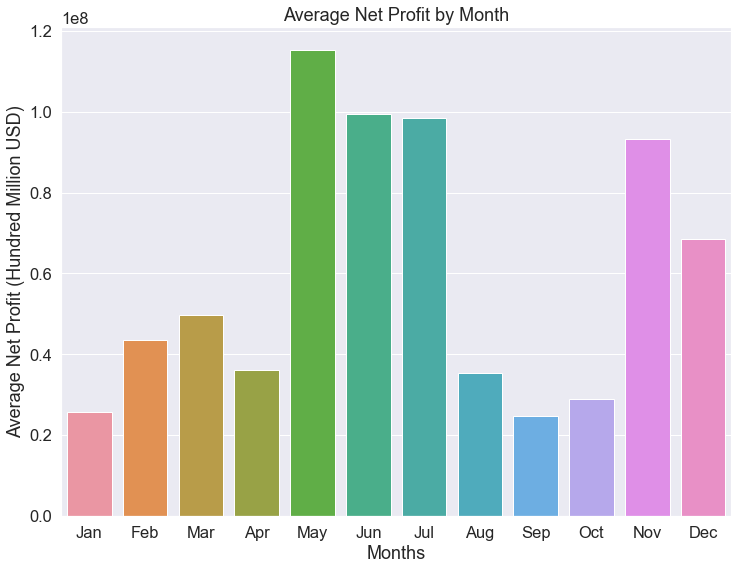

In [88]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_agg_data['month'] = pd.Categorical(month_agg_data['month'], categories=months, ordered=True)

sns.set(rc={
    'figure.figsize':(12,9)
    })
sns.set(font_scale=1.5)
barplot = sns.barplot(
    data = month_agg_data, 
    x='month', 
    y='mean_net_profit'
    )
barplot.set(
    xlabel='Months', 
    ylabel='Average Net Profit (Hundred Million USD)', 
    title='Average Net Profit by Month'
    )

With this data we can use the scipy module to perform an ANOVA test that shows whether or not there is a significant difference between the population means of the categorical variables.

In [75]:
jan = month_data[month_data.month == 'Jan'].net_profit
feb = month_data[month_data.month == 'Feb'].net_profit
mar = month_data[month_data.month == 'Mar'].net_profit
apr = month_data[month_data.month == 'Apr'].net_profit
may = month_data[month_data.month == 'May'].net_profit
jun = month_data[month_data.month == 'Jun'].net_profit
jul = month_data[month_data.month == 'Jul'].net_profit
aug = month_data[month_data.month == 'Aug'].net_profit
sep = month_data[month_data.month == 'Sep'].net_profit
oct = month_data[month_data.month == 'Oct'].net_profit
nov = month_data[month_data.month == 'Nov'].net_profit
dec = month_data[month_data.month == 'Dec'].net_profit

f_oneway(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)

F_onewayResult(statistic=24.453383228456943, pvalue=4.995036106067499e-50)

Another graphic we can provide is a lineplot showing the different months and their average net profit as well as as the sample and population means. If we can display these two means as horizontal lines on our graph we can visualize the t-test and see which months are significantly higher than the population mean.

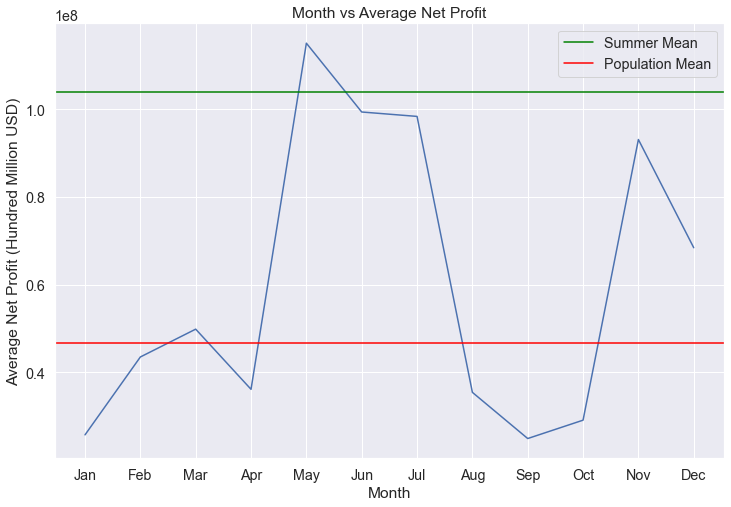

In [87]:
line_plot = sns.lineplot(data=month_agg_data, x='month', y='mean_net_profit')
line_plot.set(xlabel='Month', ylabel='Average Net Profit (Hundred Million USD)', title='Month vs Average Net Profit')
line_plot.axhline(month_data[(month_data.month == 'May')|(month_data.month == 'Jun')|(month_data.month == 'Jul') ].net_profit.mean(), color='green', label='Summer Mean')
line_plot.axhline(month_data[(month_data.month != 'May')&(month_data.month != 'Jun')&(month_data.month != 'Jul') ].net_profit.mean(), color='red', label='Population Mean')
line_plot.legend()

This graph shows quite clearly that the sample consisting of May, June, and July has an average net profit twice the amount of the population average net profit. This proves definitively that our sample mean is significantly higher with 95% confidence than the population mean.

We can also perform a 1 sample t-test in order to determine with high confidence that the month of may has a significantly different sample mean than the population.

In [76]:
ttest_1samp(may, month_data.net_profit.mean())

Ttest_1sampResult(statistic=5.3698748782509265, pvalue=1.32901576115874e-07)

With a miniscule p value, we can with confidence reject the null hypothesis and conclude that there is in fact a significant difference between the population means of the different groups, indicating that there is merit to releasing movies during the summer months as opposed to months such as September or January. With an additional t_test between the month of May and the population mean we can also determine with certainty that there is a significant difference between the month of May and the rest of the months.

## Director

# Release Month 
If we aggregate data from `The Numbers` and the `IMDB` database we can determine which directors have the movies that average the most profit.

### Step 1 - Pull the data from the database

Aggregated SQL query displaying the 10 directors with highest average net profit who have directed more than 5 movies.

In [77]:
director_AGG = pd.read_sql("""
SELECT pe.primary_name as director, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit, COUNT(pe.primary_name) as num_movies
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
GROUP BY pe.primary_name
HAVING num_movies > 5
ORDER BY mean_net_profit DESC
LIMIT 10
;
""", conn)
director_AGG

,director,mean_net_profit,num_movies
0,Tim Burton,1.908611e+08,6
1,Ridley Scott,1.769673e+08,7
2,Steven Spielberg,1.647550e+08,8
3,Jon M. Chu,1.502429e+08,6
4,Clint Eastwood,1.379160e+08,6
5,Jaume Collet-Serra,7.547862e+07,6
6,Denis Villeneuve,5.732786e+07,6
7,Tim Story,4.845786e+07,9
8,Steven Soderbergh,4.558173e+07,7
9,David Gordon Green,4.236483e+07,8


### Step 2: Generating Non-Aggregated Data

To figure out if the sample population we're looking at is significantly different from the general population of directors, we conduct a T-test using profit numbers from all of the directors. To query that data we remove our HAVING and LIMIT parts.

In [1]:
director = pd.read_sql("""
SELECT pe.primary_name as director, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
GROUP BY pe.primary_name
ORDER BY mean_net_profit DESC
;
""", conn)
director

NameError: name 'pd' is not defined

### STEP 3 - Displaying the Aggregated Data

The top 10 directors outperform the general population of directors in terms of average net profit. Below is a graph of our sample population.

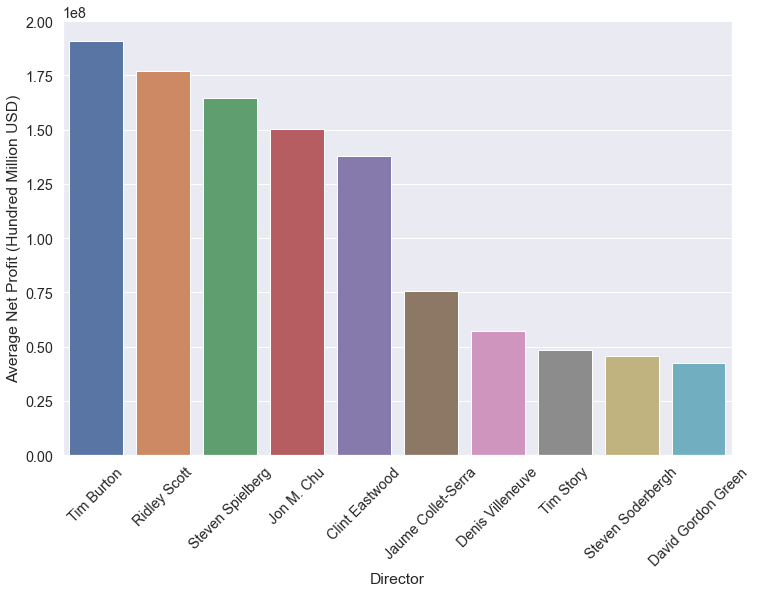

In [78]:
# mention multiple directors per movie
# mention directors that are available
sns.set(rc={
    'figure.figsize':(12,8)
    })
sns.set(font_scale=1.3)
director_plot = sns.barplot(data=director_AGG, x='director', y='mean_net_profit')
director_plot.set(xlabel='Director', ylabel='Average Net Profit (Hundred Million USD)')
director_plot.set_xticklabels(labels=director_AGG.director, rotation=45);

With the population data and the sample data we've gathered so far we can perform a 1 sided T-test do see if the directors do generate signifcantly more profit than the population of directors.

Our goal is to gain a deeper understanding of the statistics underlying our sample population, with a particular focus on identifying any significant differences between two groups, namely the directors and mean net profits. We aim to test our hypothesis that directors make a significantly higher net profit than the population mean, while rejecting the null hypothesis that they do not.

Hypothesis: (Director) makes significantly more net profit per movie than our population mean.

Null Hypothesis: (Director) does not make significantly more net profit per movie than our population mean.

The formula for the t-test is as follows:


In [80]:
population_mean = director['mean_net_profit'].mean()
sample_mean = director_AGG['mean_net_profit']

t_test = ttest_1samp(director_AGG['mean_net_profit'], population_mean)

print(t_test)

Ttest_1sampResult(statistic=2.2198435887264627, pvalue=0.05357772228437998)


The t-test statistic of 2.2198435887264623 shows that the sample population is more than 2 standard deviation from the mean. The p-value is smaller than 0.05, our critical value, meaining we can rejec the null hypotehsis that our sample mean is not different from our population mean. The p-value being smaller than our critical value of 0.05 means that it is highly unlikely that the difference between the sample mean and the population mean is due to chance. 

Sample mean of mean net profit: 108995329.64623013 
Sample standard deviation of mean net profit: 60449890.53309928 
population mean of mean net profit: 66560946.470664255 
t-test statistic: 2.2198435887264623, pvalue=0.05357772228437993

Below, we visualize the sample data as well as the population and sample means with horizontal lines showing the signifant difference. Because we have 4000 categorical variables we chose to only show the sample population, but both means are graphed to show the difference.   

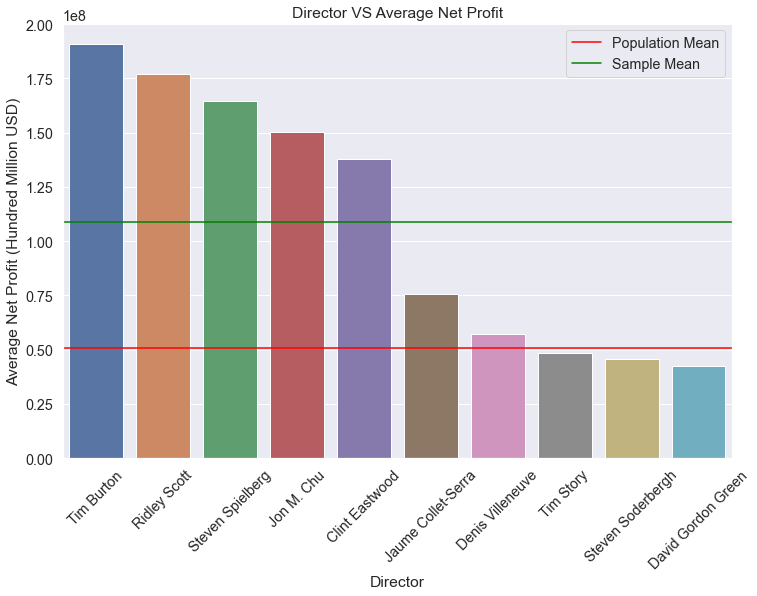

In [34]:
sns.set(rc={
    'figure.figsize':(12,8)
    })
sns.set(font_scale=1.3)
director_plot = sns.barplot(data=director_AGG, x='director', y='mean_net_profit')
director_plot.set(xlabel='Director', ylabel='Average Net Profit (Hundred Million USD)', title='Director VS Average Net Profit')
director_plot.set_xticklabels(labels=director_AGG.director, rotation=45);
director_plot.axhline(y = population_mean, color='red', label='Population Mean') 
director_plot.axhline(y = director_AGG.mean_net_profit.mean(), color='green', label='Sample Mean')
director_plot.legend()

In [2]:
sns.set(rc={
    'figure.figsize':(12,8)
    })
sns.set(font_scale=1.3)
director_plot = sns.lineplot(data=director_AGG, x='director', y='mean_net_profit')
director_plot.set(xlabel='Director', ylabel='Average Net Profit (Hundred Million USD)', title='Director VS Average Net Profit')
director_plot.set_xticklabels(labels=director_AGG.director, rotation=45);
director_plot.axhline(y = population_mean, color='red', label='Population Mean') 
director_plot.axhline(y = director_AGG.mean_net_profit.mean(), color='green', label='Sample Mean')
director_plot.legend()

NameError: name 'sns' is not defined

## Writer


Aggregated SQL query

Top 10 writers with highest mean_net_profit with num_movies greater than 5 Ordered by highest mean_net_profit descending

In [81]:
#More code!
writer_AGG = pd.read_sql("""
SELECT pe.primary_name as writer, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit, COUNT(pe.primary_name) as num_movies
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'writer'
GROUP BY pe.primary_name
HAVING num_movies > 5
ORDER BY mean_net_profit DESC
LIMIT 10
;
""", conn)
writer_AGG

,writer,mean_net_profit,num_movies
0,Jack Kirby,6.235416e+08,13
1,Stephen McFeely,6.037486e+08,7
2,Christopher Markus,6.037486e+08,7
3,Stan Lee,5.967671e+08,16
4,Linda Woolverton,5.860717e+08,7
5,Rick Jaffa,4.822119e+08,6
6,Amanda Silver,4.822119e+08,6
7,Jeff Pinkner,3.706335e+08,6
8,Jonathan Aibel,2.590552e+08,6
9,Glenn Berger,2.590552e+08,6


We're using matplotlib to create a bar graph and visualize our sample population data for better insights

<AxesSubplot:xlabel='writer'>

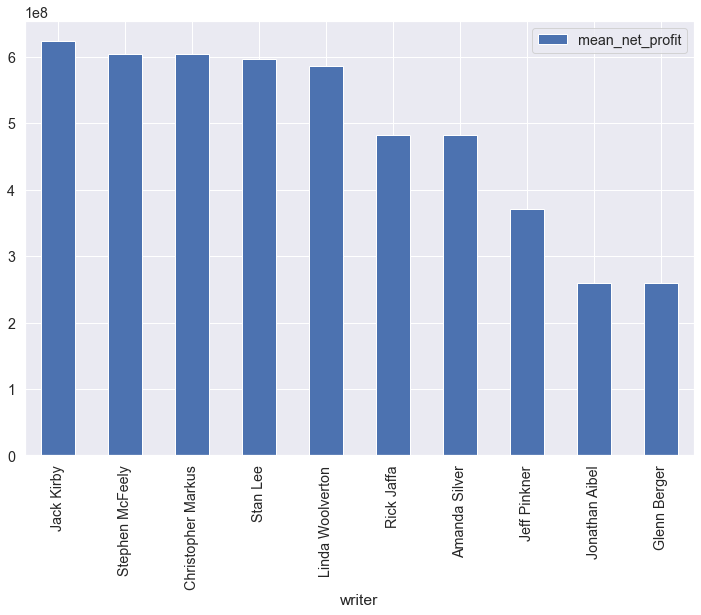

In [82]:
writer_AGG.plot.bar(x='writer', y='mean_net_profit')

Disaggregated SQL query 2 categories

Writer
net_profit

In [83]:
writer = pd.read_sql("""
SELECT pe.primary_name as writer, (mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'writer'
;
""", conn)
writer

,writer,net_profit
0,Madhan Karky,-700000
1,Sean Macaulay,22060480
2,Simon Kelton,22060480
3,Leonard Hartman,-26762748
4,Deborah Kaplan,13618920
...,...,...
4349,Emil B. Garuba,-625000
4350,Mariam Nwaringa,-625000
4351,Chijioke Ononiwu,-625000
4352,Farzaneh Fathi,-30147513


Our goal is to gain a deeper understanding of the statistics underlying our sample population, with a particular focus on identifying any significant differences between two groups, namely the writers and mean net profits. We aim to test our hypothesis that writers make a significantly higher net profit than the population mean, while rejecting the null hypothesis that they do not.

Hypothesis: (writer) makes significantly more net profit than our population mean.

Null Hypothesis: (writer) does not make significantly more net profit than our population mean.

In [84]:
sample_mean = writer_AGG['mean_net_profit'].mean()
sample_variance = ((writer_AGG['mean_net_profit'] - sample_mean)**2).sum()/(len(writer_AGG)-1)
sample_std = math.sqrt(sample_variance)
population_mean = writer['net_profit'].mean()

#t_test = (sample_mean - population_mean) / (sample_std/math.sqrt(10))
t_test = ttest_1samp(writer_AGG['mean_net_profit'], population_mean)
print("Sample mean of mean net profit:", sample_mean)
print("Sample standard deviation of mean net profit:", sample_std)
print("population mean of mean net profit:", population_mean)
print("t-test statistic:", t_test)

NameError: name 'math' is not defined

The t-test statistic of 8.347 indicates that the difference between the sample mean of mean net profit (486704518.06) and the population mean of mean net profit (107977945.74) is statistically significant. The p-value of 1.573882281540297e-05, which is less than the commonly used significance level of 0.05, also supports this conclusion.

Therefore, we can reject the null hypothesis and conclude that the top 10 writers do make significantly more net profit than the population mean. However, it is important to note that this conclusion is based on the specific sample and population studied and may not be generalizable to other populations or contexts. Further research and analysis may be necessary to confirm and extend this finding.